In [8]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## Loading the homicide data

In [3]:
homicide_df = pd.read_csv('data/homicide-data.csv', encoding='ISO-8859-1')
homicide_df.head()

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest
2,Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest
3,Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest
4,Alb-000005,20100102,MULA,VIVIAN,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest


In [4]:
len(homicide_df)

52179

In [5]:
homicide_df.isna().sum()

uid               0
reported_date     0
victim_last       1
victim_first      0
victim_race       0
victim_age        0
victim_sex        0
city              0
state             0
lat              60
lon              60
disposition       0
dtype: int64

In [6]:
homicide_df[homicide_df['victim_last'].isna()]

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
13706,Col-000255,20140619,NaN,GARY II,White,39,Male,Columbus,OH,39.935054,-82.994613,Closed by arrest


In [7]:
# Fill it with '' 
homicide_df['victim_last'] = homicide_df['victim_last'].fillna('')
homicide_df.isna().sum()

uid               0
reported_date     0
victim_last       0
victim_first      0
victim_race       0
victim_age        0
victim_sex        0
city              0
state             0
lat              60
lon              60
disposition       0
dtype: int64

In [8]:
# Remove rows with missing values in 'lat' and 'lon'
homicide_df = homicide_df.dropna(subset=['lat', 'lon'])
homicide_df.isna().sum()

uid              0
reported_date    0
victim_last      0
victim_first     0
victim_race      0
victim_age       0
victim_sex       0
city             0
state            0
lat              0
lon              0
disposition      0
dtype: int64

## Loading the income data

In [9]:
income_df = pd.read_csv('data/kaggle_income.csv', encoding='ISO-8859-1')
income_df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [10]:
len(income_df)

32526

In [11]:
income_df.isna().sum()

id            0
State_Code    0
State_Name    0
State_ab      0
County        0
City          0
Place         0
Type          0
Primary       0
Zip_Code      0
Area_Code     0
ALand         0
AWater        0
Lat           0
Lon           0
Mean          0
Median        0
Stdev         0
sum_w         0
dtype: int64

## Joining the two datasets

In [12]:
# Join the two dataframes on 'city'
df = homicide_df.merge(income_df, left_on='city', right_on='City')
df.head()

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,...,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,...,87121,505,32361309,0,34.979469,-106.797939,16025,300000,7037,71.000000
1,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,...,87105,505,8569319,1543599,34.995912,-106.699290,54511,41547,44844,1251.919514
2,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,...,88001,505,1586195582,701088,32.345585,-107.050997,74250,60784,54641,325.212690
3,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,...,87120,505,1811244,0,35.156566,-106.704143,79960,64720,55570,689.232274
4,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,...,87121,505,3538024,89947,35.031910,-106.728217,56146,49876,45409,1032.084595


In [13]:
len(df)

6609016

In [14]:
print(f'Number of cities in homicide data: {len(homicide_df["city"].unique())}')
print(f'Number of cities in income data: {len(income_df["City"].unique())}')
print(f'Number of cities in joined data: {len(df["city"].unique())}')

Number of cities in homicide data: 50
Number of cities in income data: 8128
Number of cities in joined data: 50


In [15]:
df.columns

Index(['uid', 'reported_date', 'victim_last', 'victim_first', 'victim_race',
       'victim_age', 'victim_sex', 'city', 'state', 'lat', 'lon',
       'disposition', 'id', 'State_Code', 'State_Name', 'State_ab', 'County',
       'City', 'Place', 'Type', 'Primary', 'Zip_Code', 'Area_Code', 'ALand',
       'AWater', 'Lat', 'Lon', 'Mean', 'Median', 'Stdev', 'sum_w'],
      dtype='object')

In [16]:
# Remove unnecessary columns
df = df[['uid', 'reported_date', 'victim_race',
       'victim_age', 'victim_sex', 'city', 'state', 'lat', 'lon',
       'disposition', 'ALand', 'AWater', 'Mean', 'Median', 'Stdev']]
df.head()

,uid,reported_date,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,ALand,AWater,Mean,Median,Stdev
0,Alb-000001,20100504,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,32361309,0,16025,300000,7037
1,Alb-000001,20100504,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,8569319,1543599,54511,41547,44844
2,Alb-000001,20100504,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,1586195582,701088,74250,60784,54641
3,Alb-000001,20100504,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,1811244,0,79960,64720,55570
4,Alb-000001,20100504,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,3538024,89947,56146,49876,45409


In [37]:
df_sample = df

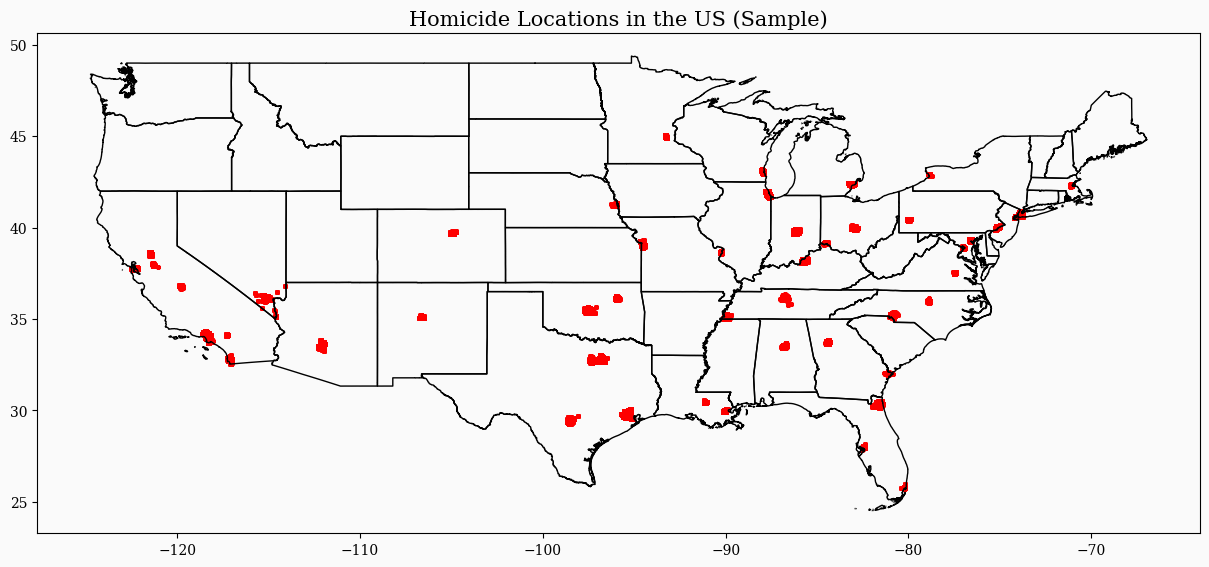

In [47]:
import geopandas as gpd
from PIL import Image
from matplotlib.patches import Patch, Circle

# PLot on us map
us_map = gpd.read_file('./data/cb_2018_us_state_500k')
us_map = us_map[~us_map.STATEFP.isin(["72", "69", "60", "66", "78", "02", "15"])]


fig, ax = plt.subplots(figsize=(15, 15))
us_map.boundary.plot(ax=ax, linewidth=1, color='black')
df_sample_gdf = gpd.GeoDataFrame(
    df_sample, geometry=gpd.points_from_xy(df_sample.lon, df_sample.lat))
df_sample_gdf.plot(ax=ax, color='red', markersize=5, alpha=0.5)
plt.title('Homicide Locations in the US (Sample)', fontsize=15)
plt.show()

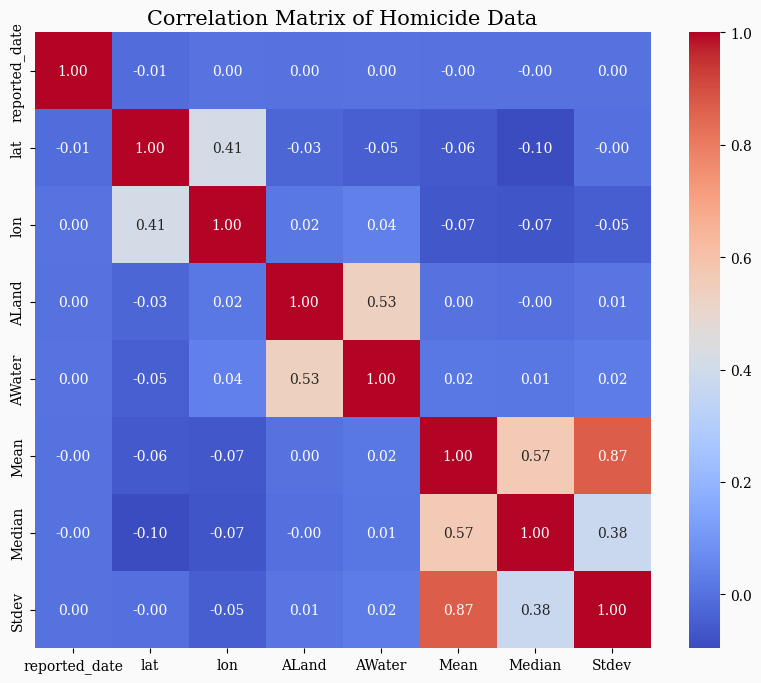

In [45]:
# Correlation matrix of numerical features
df_numeric = df.select_dtypes(include=[np.number])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Homicide Data', fontsize=15)
plt.show()

In [ ]:
# scatter plot median 
# bar charts
# us map